# Importação de bibliotecas

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from classifiers.bayesian_classifier_discriminant import BayesianGaussianDiscriminant
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator
import category_encoders as ce

# Definição de constantes

In [2]:
np.random.seed(4241)
CLASSIFIER_NAME = "Bayesian Gaussian Discriminant"
TARGET_COLUMN_NAME = "class"
DATASET_NAME = "Dermatology"
ACTIVITY_NUMBER = 4
TEST_SIZE = 0.2
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Baixando dataset dermatology

In [3]:
dermatology = fetch_ucirepo(id=33)

X_dermatology = dermatology.data.features
y_dermatology = dermatology.data.targets

dermatology_cancer_df = pd.concat([X_dermatology, y_dermatology], axis="columns")

# Tratamento de dados faltantes

In [4]:
dermatology_cancer_df["age"] = dermatology_cancer_df["age"].replace("?", np.nan)
dermatology_cancer_df.dropna(subset=["age"], inplace=True)
dermatology_cancer_df["age"] = dermatology_cancer_df["age"].astype(int)

In [5]:
dermatology_cancer_df

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [6]:
class_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}
dermatology_cancer_df[TARGET_COLUMN_NAME] = dermatology_cancer_df[TARGET_COLUMN_NAME].map(
    class_mapping
)
dermatology_cancer_df[TARGET_COLUMN_NAME]

0      1
1      0
2      2
3      0
4      2
      ..
361    3
362    3
363    2
364    2
365    0
Name: class, Length: 358, dtype: int64

In [7]:
list(dermatology_cancer_df[TARGET_COLUMN_NAME].unique())

[np.int64(1), np.int64(0), np.int64(2), np.int64(4), np.int64(3), np.int64(5)]

In [8]:
dermatology_cancer_df

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,1
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,2
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,0
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,3
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,3
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,2
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,2


# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Naive Bayes

In [9]:
naive_bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=dermatology_cancer_df,
    n_indexes=HOLDOUT_INDEXES_NUMBER,
    test_size=TEST_SIZE,
)

naive_bayesian_accuracy_list = []

for train_indexes, test_indexes in naive_bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=dermatology_cancer_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = BayesianGaussianDiscriminant(discriminant_type="linear")
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    naive_bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

naive_bayesian_df_results = pd.DataFrame(
    naive_bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

naive_bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,0.985915,0.014085,"[7, 199, 312, 207, 274, 237, 115, 95, 174, 256...","[2, 3, 131, 132, 6, 261, 11, 267, 16, 17, 272,...","[2, 0, 0, 2, 4, 3, 1, 5, 1, 0, 0, 0, 3, 1, 1, ...","[[24, 0, 0, 0, 0, 0], [0, 9, 0, 0, 0, 0], [0, ..."
1,1.000000,0.000000,"[4, 54, 168, 355, 26, 186, 121, 101, 24, 57, 3...","[0, 1, 2, 128, 258, 7, 12, 142, 274, 23, 156, ...","[1, 0, 2, 4, 3, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, ...","[[23, 0, 0, 0, 0, 0], [0, 13, 0, 0, 0, 0], [0,..."
2,0.985915,0.014085,"[282, 171, 351, 157, 14, 340, 308, 302, 280, 1...","[256, 1, 129, 4, 132, 134, 136, 11, 12, 267, 2...","[3, 0, 3, 2, 2, 4, 3, 1, 1, 5, 3, 0, 5, 1, 1, ...","[[23, 0, 0, 0, 0, 0], [0, 11, 0, 0, 0, 0], [0,..."
3,0.971831,0.028169,"[361, 358, 170, 256, 64, 85, 68, 220, 24, 316,...","[128, 8, 136, 137, 11, 138, 139, 14, 15, 16, 2...","[4, 3, 3, 1, 1, 2, 0, 2, 3, 1, 5, 2, 3, 1, 4, ...","[[22, 0, 0, 0, 0, 0], [0, 10, 0, 1, 0, 0], [0,..."
4,0.957746,0.042254,"[96, 340, 131, 266, 79, 257, 40, 272, 116, 294...","[1, 130, 135, 136, 9, 11, 12, 13, 141, 273, 19...","[0, 0, 0, 3, 3, 1, 1, 0, 0, 0, 4, 5, 1, 1, 4, ...","[[20, 0, 0, 0, 0, 0], [0, 10, 0, 2, 0, 0], [0,..."
...,...,...,...,...,...,...
195,0.957746,0.042254,"[147, 295, 331, 49, 237, 2, 253, 299, 115, 189...","[256, 4, 132, 6, 7, 12, 269, 142, 18, 275, 22,...","[3, 2, 2, 4, 2, 1, 3, 0, 2, 0, 4, 3, 0, 5, 3, ...","[[21, 0, 0, 0, 0, 0], [0, 13, 0, 1, 0, 0], [0,..."
196,0.957746,0.042254,"[142, 60, 203, 57, 123, 258, 273, 16, 170, 297...","[256, 129, 268, 141, 270, 143, 144, 17, 18, 22...","[3, 3, 5, 0, 3, 4, 2, 0, 2, 1, 3, 1, 0, 0, 4, ...","[[22, 1, 0, 0, 0, 0], [0, 13, 0, 0, 0, 0], [0,..."
197,0.985915,0.014085,"[288, 40, 178, 98, 92, 75, 73, 56, 183, 41, 13...","[1, 257, 3, 259, 7, 266, 139, 12, 267, 142, 27...","[0, 1, 0, 3, 2, 5, 0, 1, 5, 0, 0, 2, 3, 0, 3, ...","[[21, 0, 0, 0, 0, 0], [0, 9, 0, 0, 0, 0], [0, ..."
198,0.943662,0.056338,"[152, 22, 299, 273, 214, 44, 278, 29, 103, 304...","[4, 5, 6, 9, 10, 137, 268, 13, 142, 269, 145, ...","[2, 1, 4, 3, 0, 1, 5, 0, 0, 3, 2, 0, 0, 0, 3, ...","[[23, 0, 0, 0, 0, 0], [0, 8, 0, 2, 0, 0], [0, ..."


# Vetor de acurácias

In [10]:
naive_bayesian_accuracy_vector = pd.Series(naive_bayesian_df_results["accuracy"])

In [11]:
naive_bayesian_accuracy_vector

0      0.985915
1      1.000000
2      0.985915
3      0.971831
4      0.957746
         ...   
195    0.957746
196    0.957746
197    0.985915
198    0.943662
199    0.929577
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [12]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

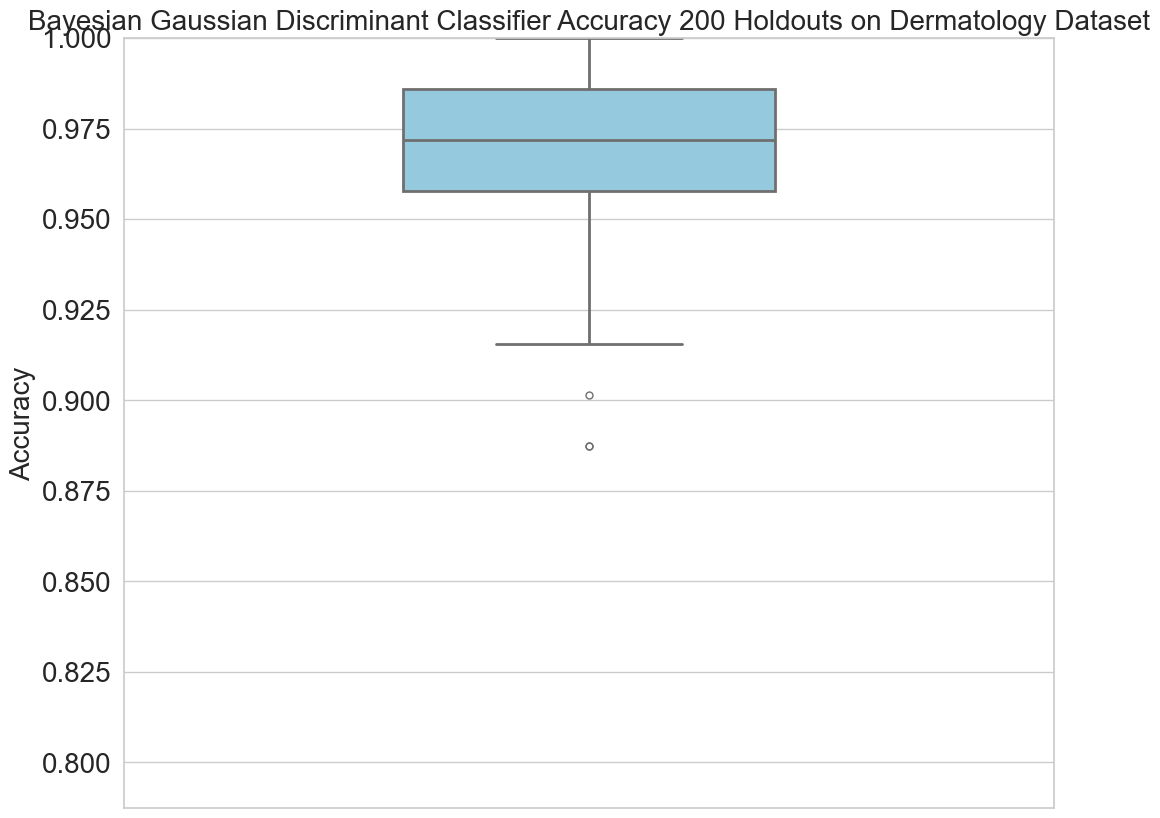

In [13]:
image_type = "boxplot"

image_generator.create_boxplot(
    vector_distribution=naive_bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [14]:
max_accuracy = naive_bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = naive_bayesian_df_results[
    naive_bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = naive_bayesian_df_results.loc[
    index_selected, "train_indexes"
]
best_accuracy_test_indexes = naive_bayesian_df_results.loc[
    index_selected, "test_indexes"
]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=dermatology_cancer_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [1, 6, 16, 39, 42, 43, 52, 59, 60, 62, 101, 110, 112, 117, 126, 133, 136, 147, 184]
Índice selecionado aleatoriamente: 59
Acurácia do índice selecionado: 100.00%


# Resgatando a matriz de confusão e plotando ela

In [15]:
confusion_matrix_result = naive_bayesian_df_results.loc[
    index_selected, "confusion_matrix"
]

In [16]:
confusion_matrix_result

array([[19,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  5]])

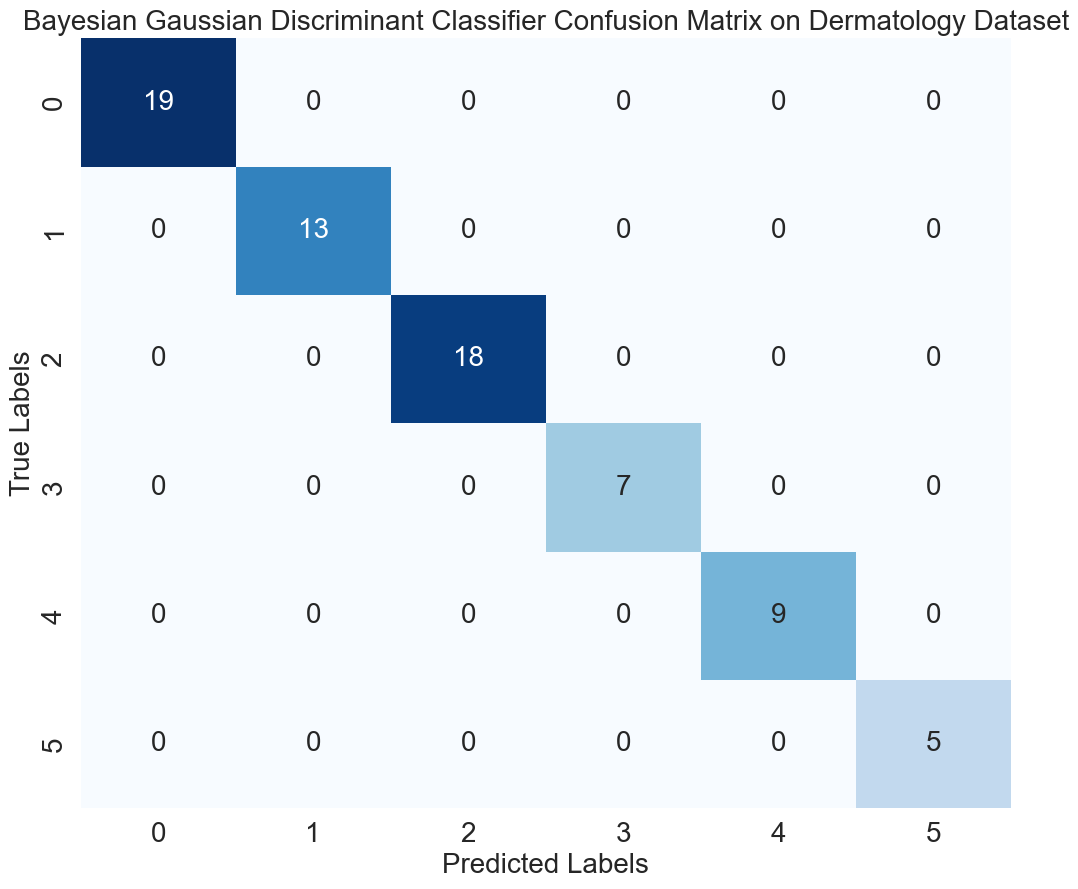

In [17]:
image_type = "confusion_matrix"

image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Naive Bayes baseado em duas features

In [18]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = BayesianGaussianDiscriminant(discriminant_type="linear")
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Naive Bayes

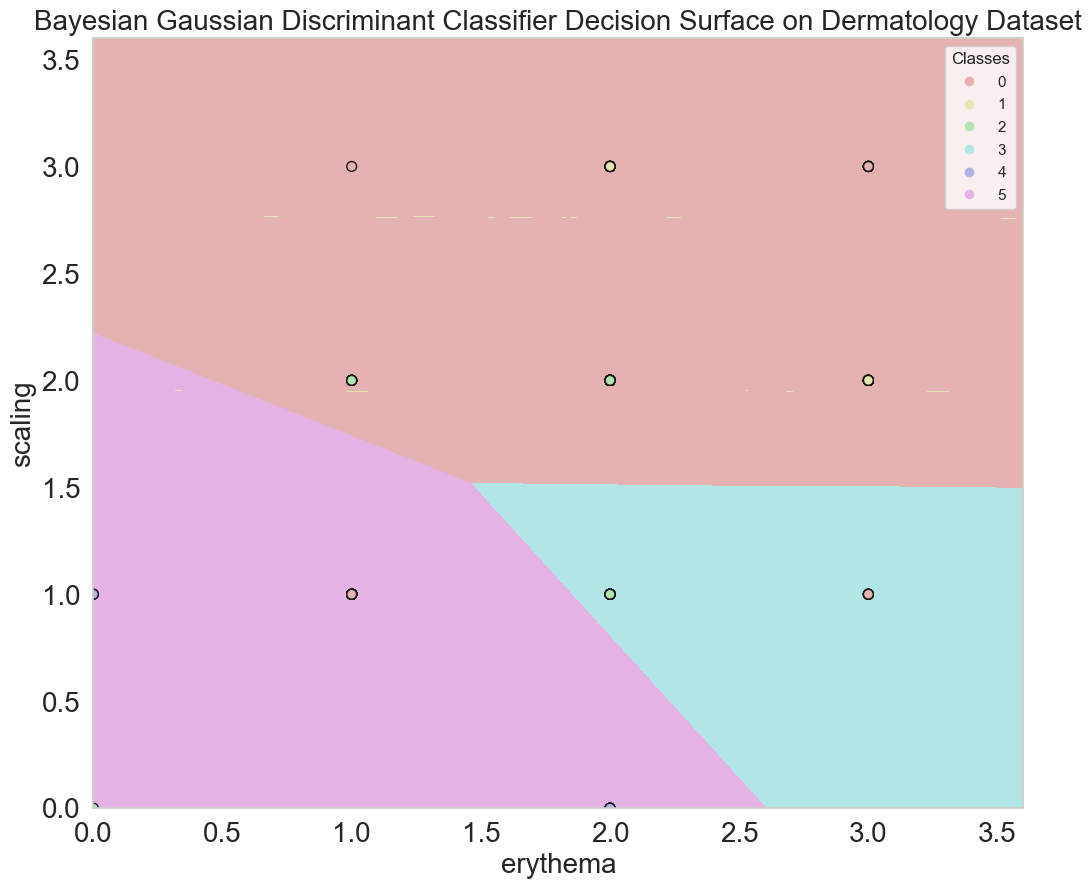

In [19]:
image_type = "decision_surface_linear"

image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    num_classes=len(np.unique(y_train)),
    show=True,
)

In [20]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = BayesianGaussianDiscriminant(discriminant_type="quadratic")
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

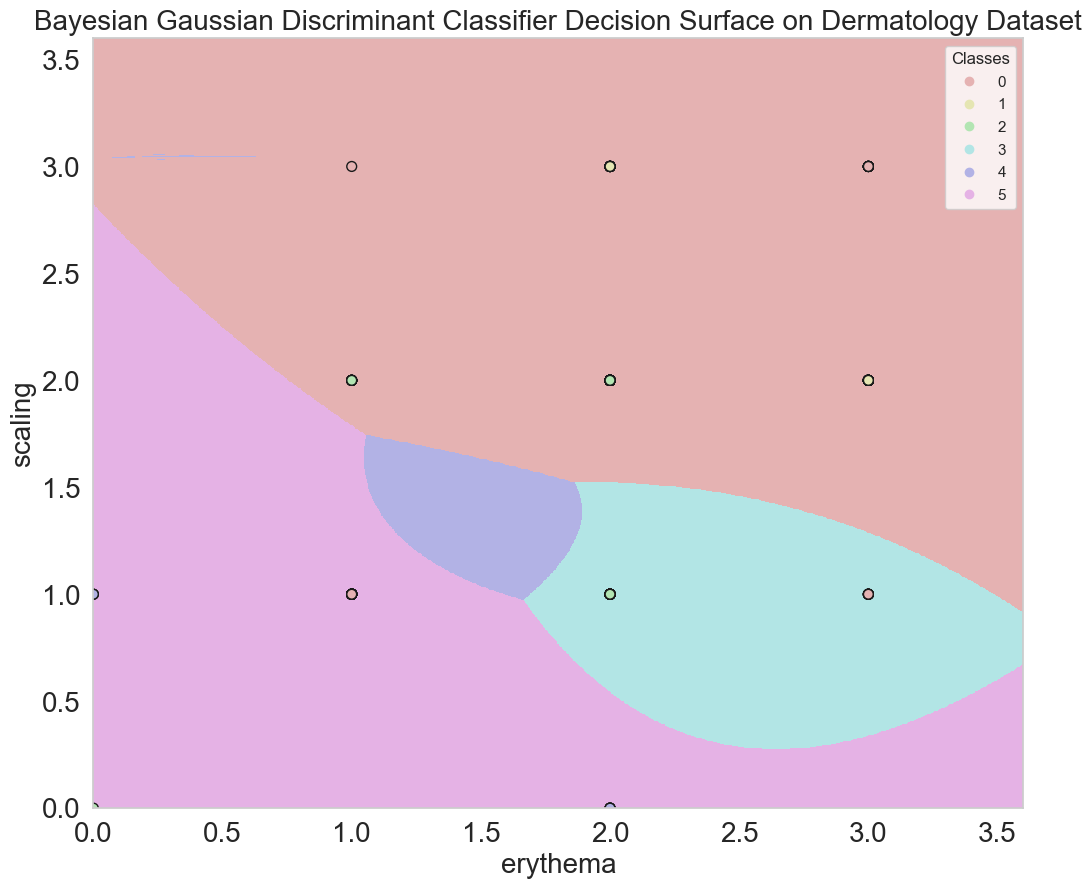

In [21]:
image_type = "decision_surface_quadratic"

image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    num_classes=len(np.unique(y_train)),
    show=True,
)